In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.set_option('max_rows', 5)
%matplotlib inline

## ヒストグラムの問題点
---
分布が滑らかでなく、区間の分割方法によってグラフから受ける印象が大きく異なる。

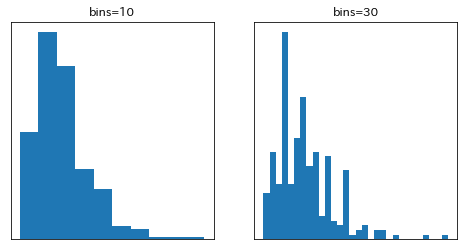

In [2]:
from helpers.kernel_density_estimation import histogram
histogram.show()

## カーネル密度推定 (kernel density estimation)
---
データ $( x_{1} ,x_{2} ,\dotsc ,x_{n})$ の分布を滑らかな確率密度関数で表す。  
この確率密度関数 $f(x)$ はカーネル関数 $K$ を用いて $\displaystyle f( x) =\frac{1}{nh}\sum ^{n}_{i=1} K\left(\frac{x-x_{i}}{h}\right)$ と表される。 ($h$ はバンド幅と呼ばれるパラメータ)  
カーネル関数にはガウシアンカーネル (標準正規分布の確率密度関数と同じ) $\displaystyle \frac{1}{\sqrt{2\pi }} e^{-\frac{x^{2}}{2}}$ を用いることが多い。

直観的には $\displaystyle \sum ^{n}_{i=1} K\left(\frac{x-x_{i}}{h}\right)$ の部分は各サンプルを中心とする確率分布の重ね合わせ、またはカーネル関数の畳み込み演算 (カーネル関数を順次スライドさせていったときの各サンプルに対応する確率密度の合計) と捉えられ、 $\displaystyle \frac{1}{nh}$ は全体の確率を $1$ にするための正規化定数と考えられる。

In [3]:
from helpers.kernel_density_estimation import summation
summation.show()

Play(value=1, interval=1000, max=6, min=1)

Output()

In [4]:
from helpers.kernel_density_estimation import convolution
convolution.show()

Play(value=1, interval=200, max=50, min=1)

Output()

###### 練習問題

データセット`tip`の分布をバンド幅 0.5 のガウシアンカーネルで推定し、得られた確率密度のグラフを表示する。

In [5]:
tip = sns.load_dataset('tips')['tip']
display(tip)

0      1.01
1      1.66
       ... 
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

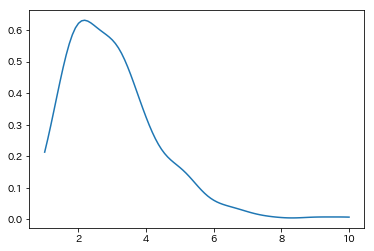

In [6]:
n = tip.size
h = 0.5
distributions = stats.norm(loc=tip, scale=h)
x = np.linspace(tip.min(), tip.max(), 100).reshape((-1, 1))
plt.plot(x, distributions.pdf(x).sum(axis=1) / n / h)
plt.show()

## Pythonでのカーネル密度推定実行方法
---
密度関数を求めたい場合には`scipy.stats.gaussian_kde`または`statsmodels.nonparametric.kde`を使用する。  
グラフ表示だけなら、`pandas.DataFrame.plot.density`または`seaborn.kdeplot`を使用する。

カーネル密度推定はヒストグラムより滑らかで分布を把握しやすいが、**バンド幅の設定によって形は変わる**。`scipy`や`statsmodels`ではバンド幅を自動設定してくれるが、一応注意しておく。

In [7]:
pd.DataFrame.plot.density??

In [8]:
sns.kdeplot??

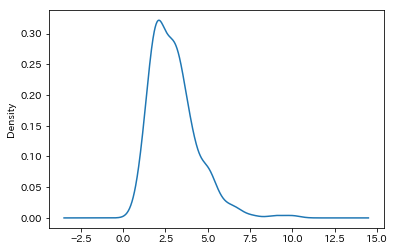

In [9]:
tip.plot.density()
plt.show()

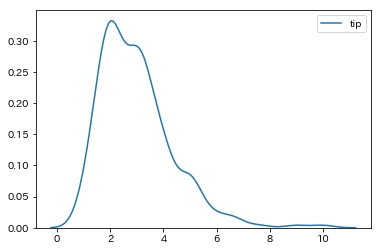

In [10]:
sns.kdeplot(tip)
plt.show()